# Web scraping 3: Search

In [21]:
# Import libreries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from datetime import datetime
from datetime import timedelta
from urllib.parse import urljoin
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

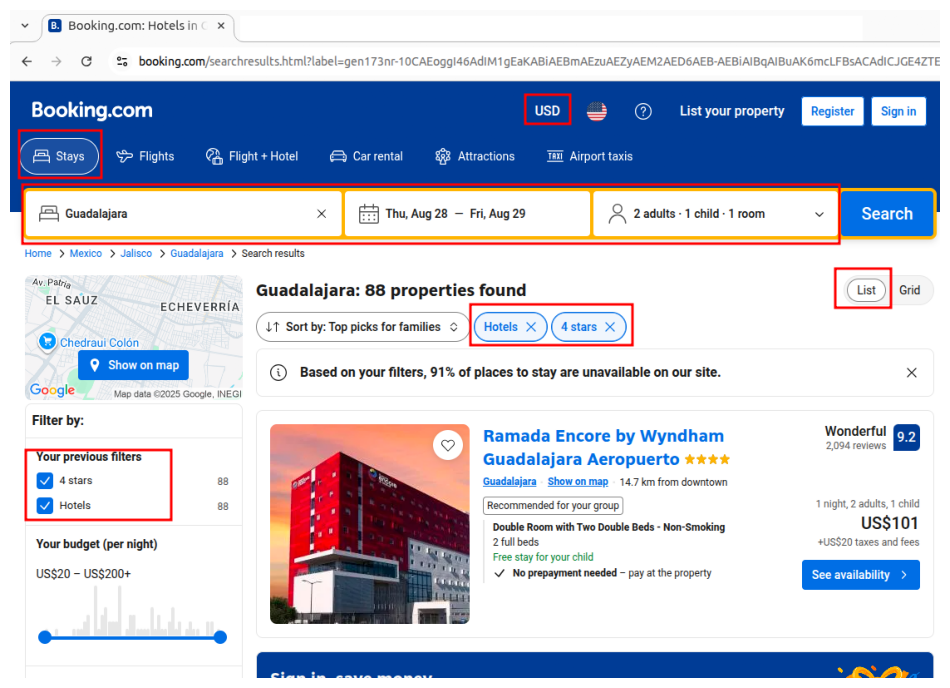

In [22]:
img = mpimg.imread("../images/hotels.png")

plt.figure(figsize=(12,10))  # width, height in inches
plt.imshow(img)
plt.axis("off")  # hide axes
plt.show()

Full URL: https://www.booking.com/searchresults.html?ss=Vallarta%2C+Mexico&dest_type=city&checkin=2025-08-28&checkout=2025-08-29&group_adults=2&no_rooms=1&group_children=1&age=2

In [23]:
# Date transformation
checkin_date = datetime.today() + timedelta(days=0)
checkout_date = checkin_date + timedelta(days=1)

checkin_date = checkin_date.strftime('%Y-%m-%d')
checkout_date = checkout_date.strftime('%Y-%m-%d')

print(checkin_date)
print(checkout_date)

2025-08-28
2025-08-29


In [24]:
# URL parametrization
city = 'Quito'
country = 'Ecuador'
adults = 2
rooms = 1
children = 1
children_ages = 2

URL = f'https://www.booking.com/searchresults.html?ss={city}%2C+{country}&dest_type=city'
URL += f'&checkin={checkin_date}&checkout={checkout_date}&group_adults={adults}&no_rooms={rooms}&group_children={children}&age={children_ages}'

print(URL)

https://www.booking.com/searchresults.html?ss=Quito%2C+Ecuador&dest_type=city&checkin=2025-08-28&checkout=2025-08-29&group_adults=2&no_rooms=1&group_children=1&age=2


In [25]:
# Set user-agent parameters simulating this script is not a web scraping script
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

In [26]:
request = requests.get(URL, headers=headers)
soup = bs(request.text, 'lxml')

table = soup.find_all('div', attrs={"data-testid": "property-card"})
print(len(table))

25


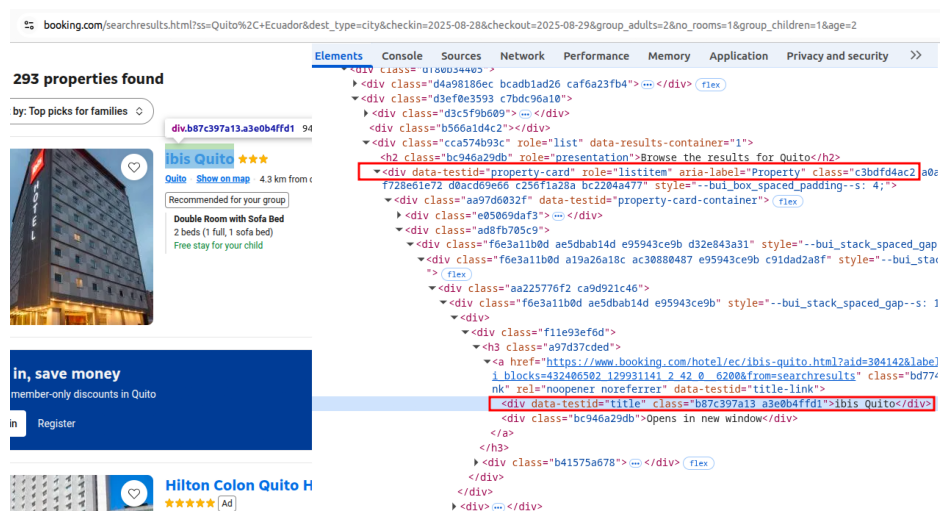

In [27]:
img = mpimg.imread("../images/hotel_div.png")

plt.figure(figsize=(12,10))     # width, height in inches
plt.imshow(img)
plt.axis("off")                 # hide axes
plt.show()

In [28]:
# Get hotels
hotels = []
for row in table:
    name = row.find('div', attrs={"data-testid": "title"}).text.strip().replace(',','').replace(';','')
    hotels.append(name)

print(hotels[0])
print(len(hotels))

Dann Carlton Quito
25


In [29]:
# Get location from downtown
locations = []
for row in table:
    location = row.find('span', attrs={"data-testid": "address"}).text.strip().replace(';','')
    locations.append(location)

In [30]:
# Get prices
prices = []
for row in table:
    price_all = row.find('span', attrs={"data-testid": "price-and-discounted-price"}).text
    price = float(price_all.replace('MXN','').replace(",","").strip())
    prices.append(price)


In [31]:
print(f"Number of hotels, locations and prices: {len(hotels)}, {len(locations)} and {len(prices)}, respectively")

Number of hotels, locations and prices: 25, 25 and 25, respectively


In [32]:
df_hotels = pd.DataFrame(data={'Hotel': hotels, 'Location': locations, 'Price': prices})
print(df_hotels.head(3))

file_name = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
df_hotels.to_csv(f"../data/hotels_{file_name}.csv", index=False, sep='\t')

                  Hotel                          Location   Price
0    Dann Carlton Quito  La Carolina, Quito (La Carolina)  1927.0
1       Swissotel Quito                La Floresta, Quito  3059.0
2  Wyndham Garden Quito  La Carolina, Quito (La Carolina)  1670.0
